In [22]:
from google.colab import files
import os

uploaded = files.upload()                # selecione o tempo.csv
orig = list(uploaded.keys())[0]
os.rename(orig, 'tempo.csv')            # garante nome correto

Saving tempo.csv to tempo (1).csv


Total de registros: 17
Frequência Appearance: {'sol': 10, 'nublado': 4, 'chuva': 3}
Frequência Play (0=não,1=sim): {0: 3, 1: 14}
Temp → min:61, max:85, média:70.9
Hum  → min:65,  max:97,  média:83.9


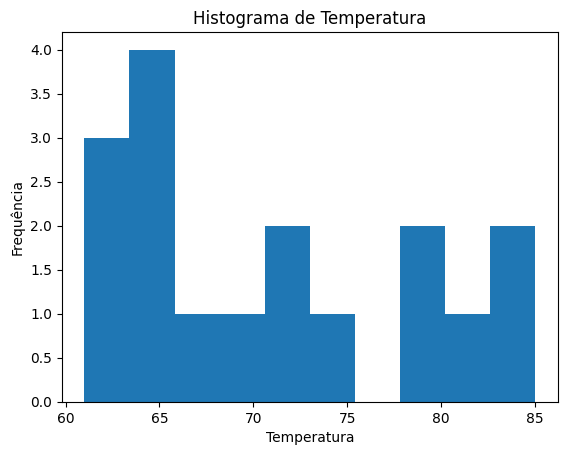

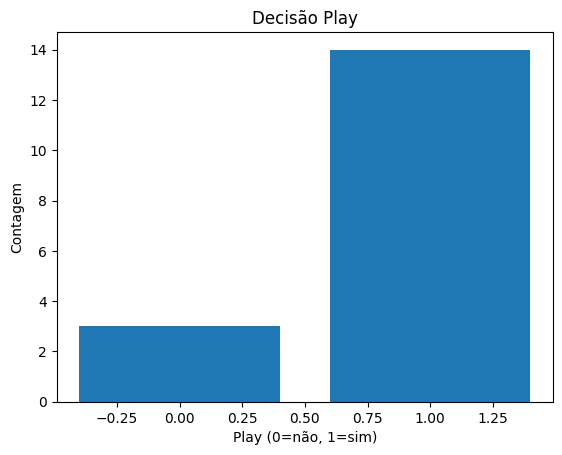

In [23]:
import csv
import matplotlib.pyplot as plt

def ler_dados(arquivo):
    with open(arquivo, newline='') as f:
        return list(csv.DictReader(f))

def tratar_dados(linhas):
    limpos = []
    for l in linhas:
        if l['Play'] == '':
            continue
        apar = l['Appearance']
        if apar == 'sols':   apar = 'sol'
        if apar == 'menos':  apar = 'nublado'
        temp = int(l['Temperature'])
        hum  = int(l['Humidity'])
        if temp >= 100 or hum >= 100:
            continue
        wind = 1 if l['Wind'] == 'sim' else 0
        play = 1 if l['Play'] == 'sim' else 0
        limpos.append({
            'Appearance': apar,
            'Temperature': temp,
            'Humidity': hum,
            'Wind': wind,
            'Play': play
        })
    return limpos

linhas = ler_dados('tempo.csv')
dados  = tratar_dados(linhas)

# Estatísticas
temps = [d['Temperature'] for d in dados]
hums  = [d['Humidity']  for d in dados]
freq_app  = {}
freq_play = {0:0, 1:0}
for d in dados:
    freq_app[d['Appearance']] = freq_app.get(d['Appearance'], 0) + 1
    freq_play[d['Play']] += 1

print('Total de registros:', len(dados))
print('Frequência Appearance:', freq_app)
print('Frequência Play (0=não,1=sim):', freq_play)
print(f'Temp → min:{min(temps)}, max:{max(temps)}, média:{sum(temps)/len(temps):.1f}')
print(f'Hum  → min:{min(hums)},  max:{max(hums)},  média:{sum(hums)/len(hums):.1f}')

# Gráficos
plt.hist(temps)
plt.title('Histograma de Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.show()

plt.bar([0,1], [freq_play[0], freq_play[1]])
plt.title('Decisão Play')
plt.xlabel('Play (0=não, 1=sim)')
plt.ylabel('Contagem')
plt.show()